In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
df=pd.read_csv("./data/real_estate.csv")

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
df.shape

(20640, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
df["total_bedrooms"].median()

435.0

In [12]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [13]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [14]:
df["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [16]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
ocean_proximity           5
median_house_value     3842
dtype: int64

In [17]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [19]:
df=pd.get_dummies(df)
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False


In [21]:
df.corr()["median_house_value"]

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049457
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
Name: median_house_value, dtype: float64

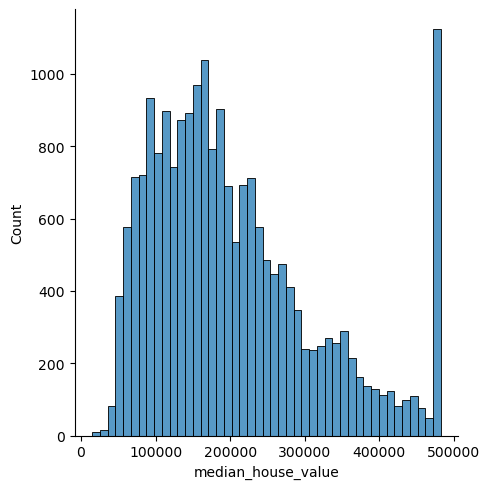

In [25]:
sns.displot(df["median_house_value"])

In [27]:
df["median_house_value"].skew()

0.912330478793392

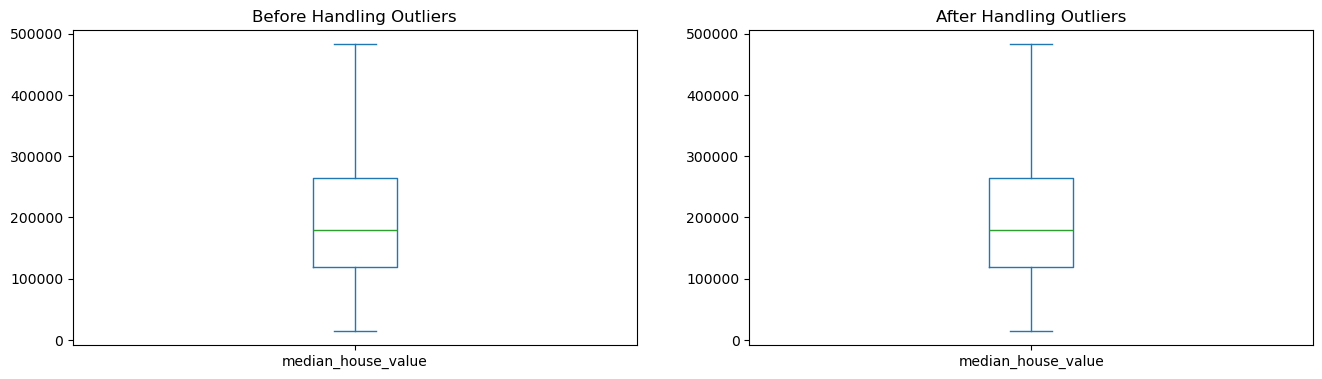

In [26]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.title("Before Handling Outliers")
df["median_house_value"].plot.box()
Q1=df["median_house_value"].quantile(0.25)
Q3=df["median_house_value"].quantile(0.75)
IQR=Q3-Q1
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
df["median_house_value"][df["median_house_value"]<Lower_limit] =Lower_limit
df["median_house_value"][df["median_house_value"]>Upper_limit] =Upper_limit
plt.subplot(2,2,2)
plt.title("After Handling Outliers")
df["median_house_value"].plot.box()
plt.show()

In [28]:
my_columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

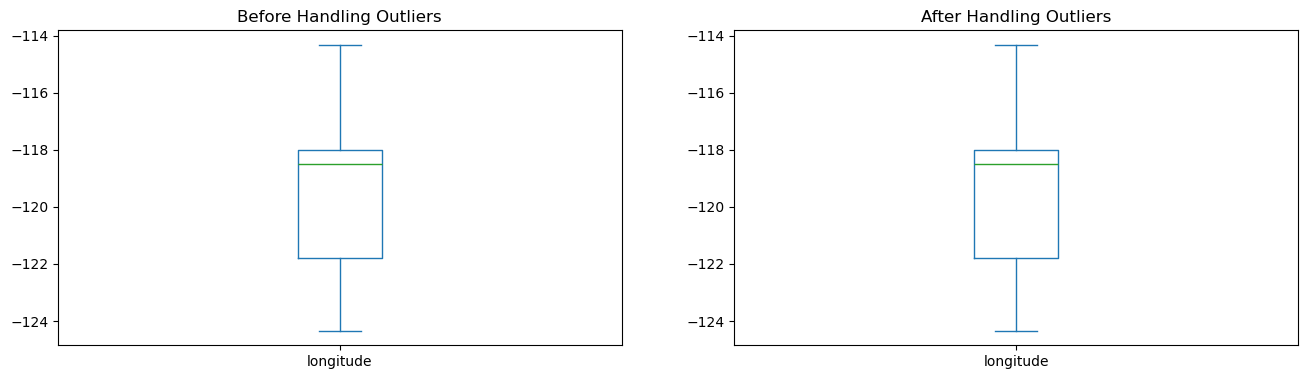

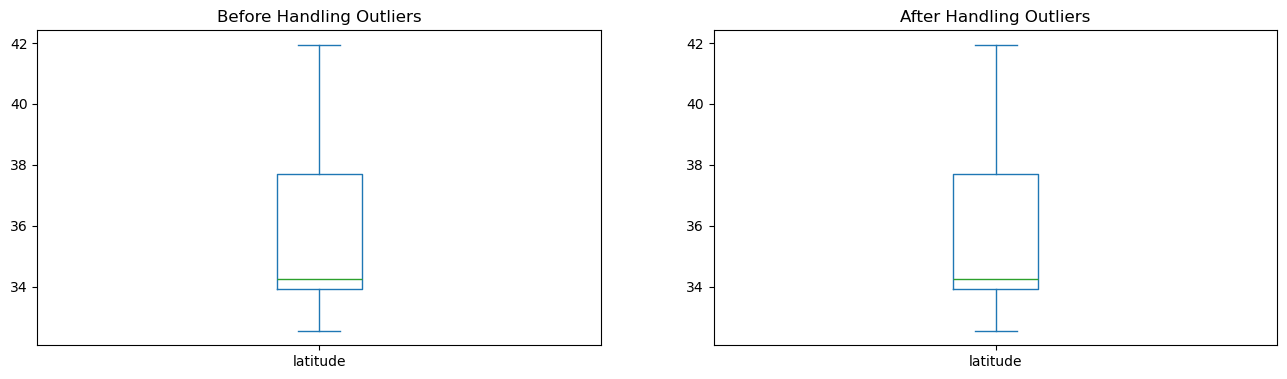

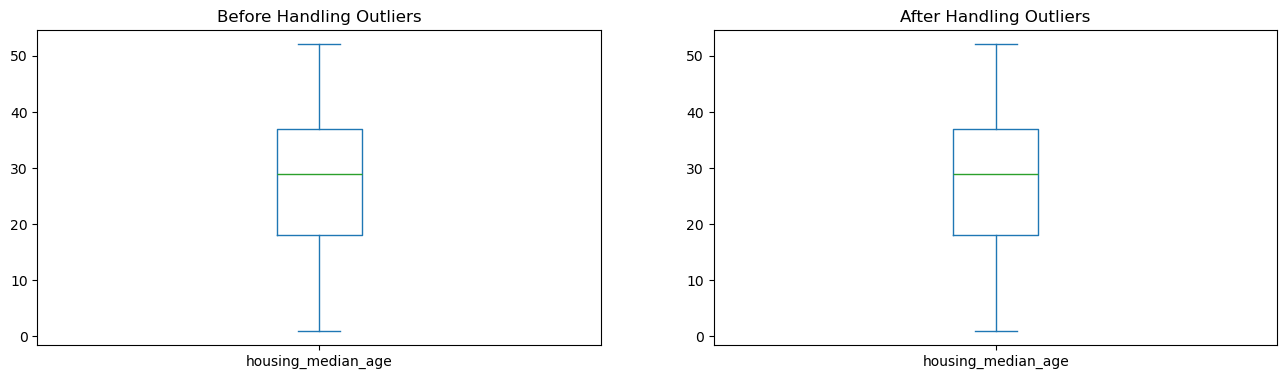

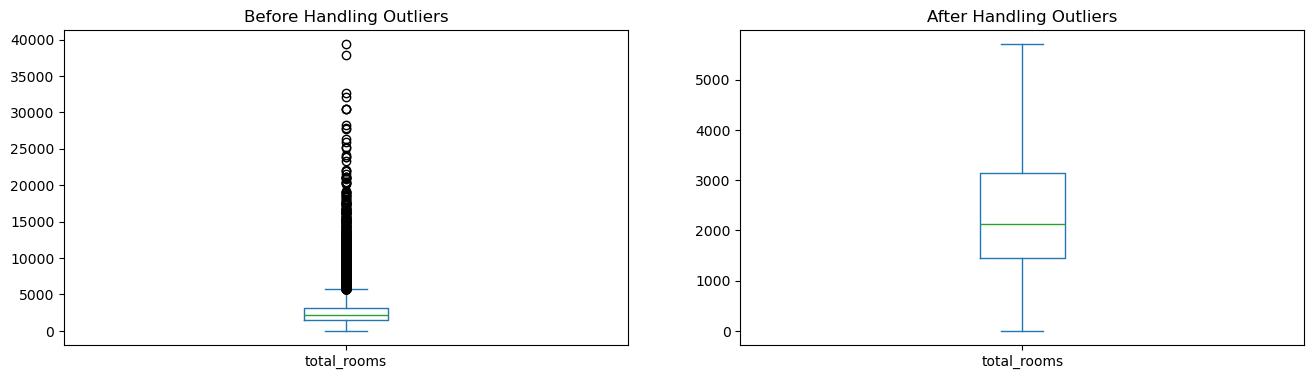

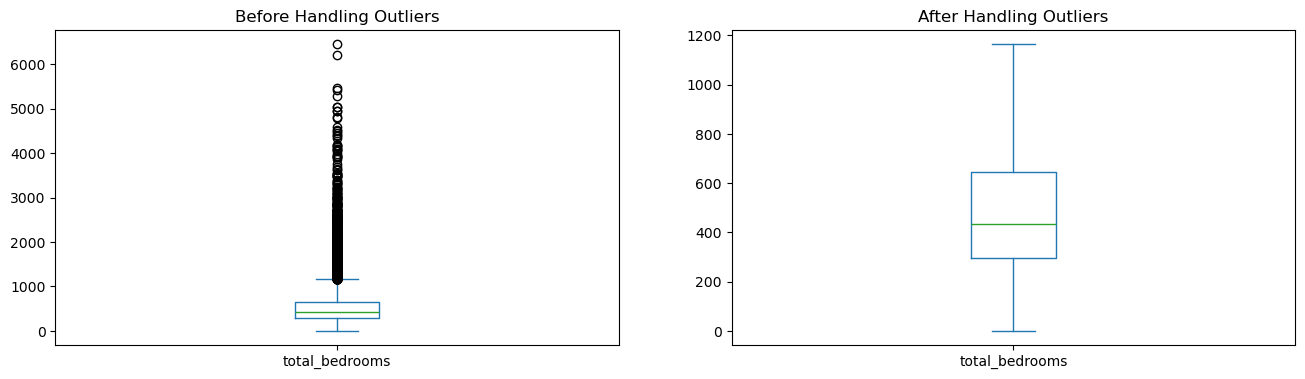

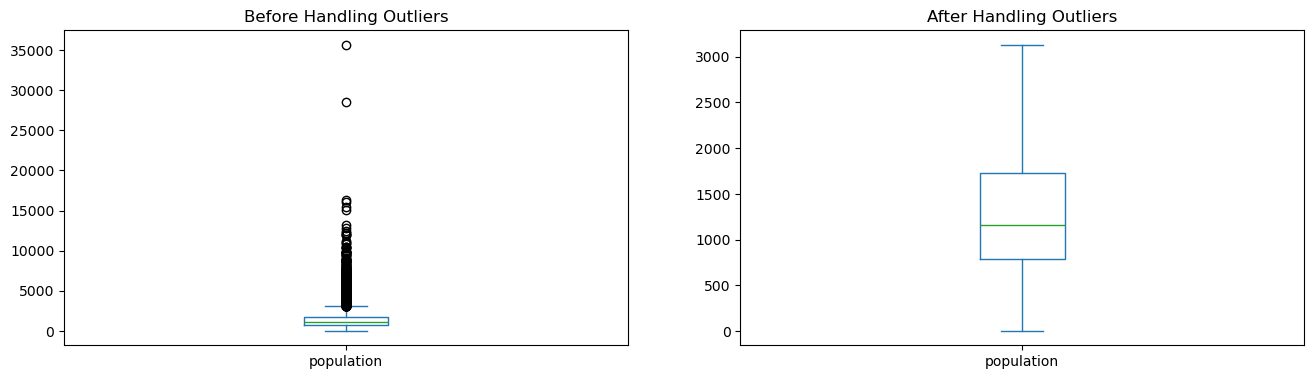

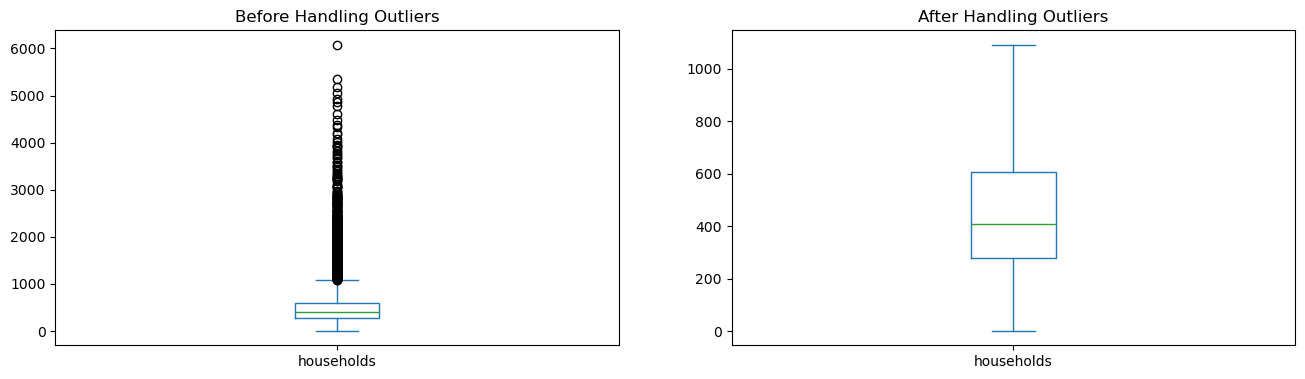

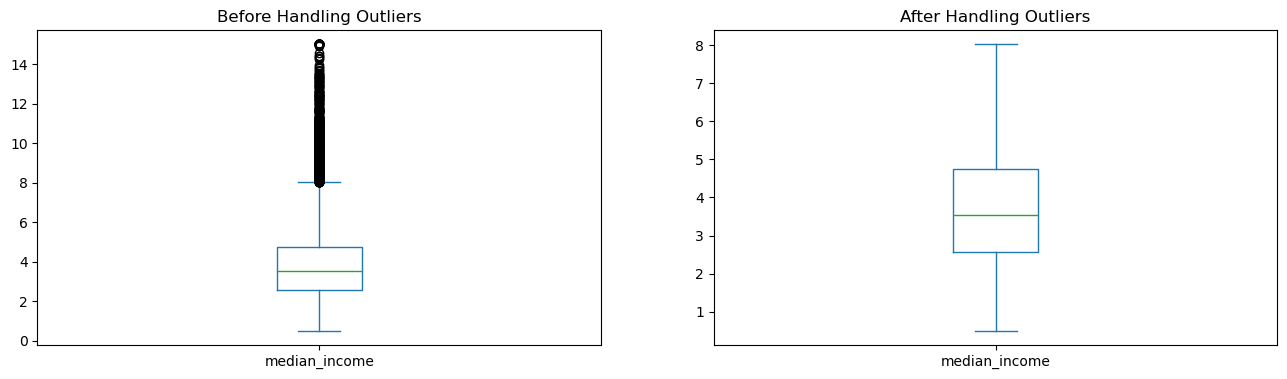

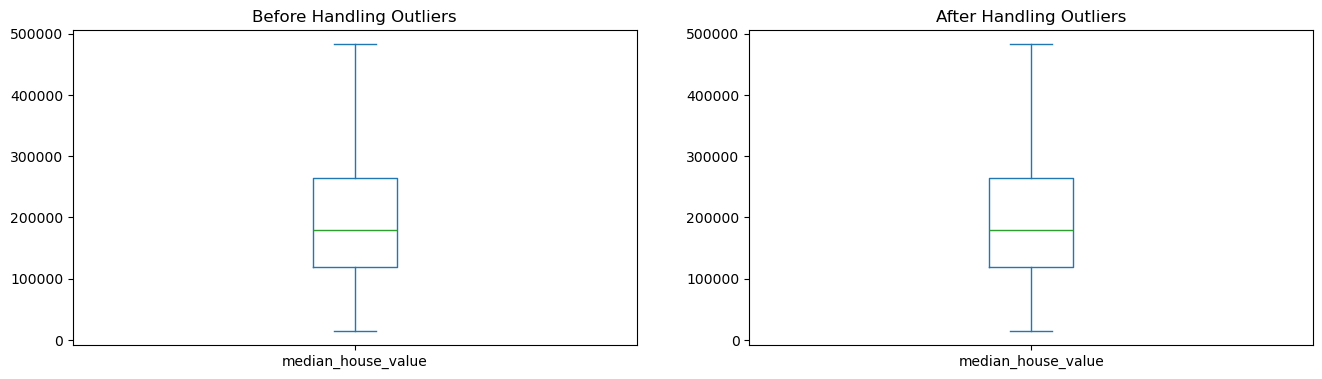

In [29]:
for i in my_columns:
    plt.figure(figsize=(16,9))
    plt.subplot(2,2,1)
    plt.title("Before Handling Outliers")
    df[i].plot.box()
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Lower_limit=Q1-1.5*IQR
    Upper_limit=Q3+1.5*IQR
    df[i][df[i]<Lower_limit] =Lower_limit
    df[i][df[i]>Upper_limit] =Upper_limit
    plt.subplot(2,2,2)
    plt.title("After Handling Outliers")
    df[i].plot.box()
    plt.show()

In [30]:
df["rooms_per_total_bedrooms"]=df["total_rooms"]/df["total_bedrooms"]
df["median_income_per_population"]=df["median_income"]/df["population"]
df["total_rooms_per_households"]=df["total_rooms"]/df["households"]

In [31]:
X=df.drop("median_house_value",axis=1)
y=df["median_house_value"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


# XGBoost

XGBRegressor uses Gradient Boosting Method which combines weak learners with learning rate and regularisation technique to evolve them into a strong machine learning model

In [36]:
from xgboost import XGBRegressor
XGB = XGBRegressor(random_state=100)
XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
lin_mse= round(mean_squared_error(y_pred,y_test),2)
lin_rmse= round(np.sqrt(lin_mse),2)
print("R2 score : ", round(r2_score(y_pred,y_test),2),"\n","RMSE :",lin_rmse)

R2 score :  0.81 
 RMSE : 45313.42


### To verify the results, we will do a cross validation

In [40]:
from sklearn.model_selection import cross_val_score

XGB_scores= cross_val_score(XGB, X_train, y_train, scoring="neg_mean_squared_error",cv=4)
XGB_rmse_scores=np.sqrt(-XGB_scores)

In [41]:
def display_scores(scores):
    print("Scores :", scores.round(2))
    print("Mean:",round(scores.mean(),2))
    print("Standard Deviation: ", round(scores.std(),2))
    print(round(r2_score(y_pred,y_test),2))

display_scores(XGB_rmse_scores)

Scores : [47250.09 46941.1  49137.14 48101.27]
Mean: 47857.4
Standard Deviation:  852.3
0.81


In [43]:
from sklearn.model_selection import GridSearchCV
search_space={"n-estimators":[100,500,1000],
              "max_depth":[2,4,6],
              "learning_rate":[0.1,0.06,0.01]
             }
XGB_model = XGBRegressor(random_state=100)

grid_XG = GridSearchCV(estimator =XGB_model,
                       param_grid=search_space,
                       scoring="neg_root_mean_squared_error",
                       cv=4,
                       verbose=4)
grid_XG.fit(X_train,y_train)
print(grid_XG.best_estimator_)
print(grid_XG.best_params_)
print(grid_XG.best_score_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV 1/4] END learning_rate=0.1, max_depth=2, n-estimators=100;, score=-58103.977 total time=   0.0s
[CV 2/4] END learning_rate=0.1, max_depth=2, n-estimators=100;, score=-59195.163 total time=   0.0s
[CV 3/4] END learning_rate=0.1, max_depth=2, n-estimators=100;, score=-60435.186 total time=   0.0s
[CV 4/4] END learning_rate=0.1, max_depth=2, n-estimators=100;, score=-60272.357 total time=   0.0s
[CV 1/4] END learning_rate=0.1, max_depth=2, n-estimators=500;, score=-58103.977 total time=   0.0s
[CV 2/4] END learning_rate=0.1, max_depth=2, n-estimators=500;, score=-59195.163 total time=   0.0s
[CV 3/4] END learning_rate=0.1, max_depth=2, n-estimators=500;, score=-60435.186 total time=   0.0s
[CV 4/4] END learning_rate=0.1, max_depth=2, n-estimators=500;, score=-60272.357 total time=   0.0s
[CV 1/4] END learning_rate=0.1, max_depth=2, n-estimators=1000;, score=-58103.977 total time=   0.0s
[CV 2/4] END learning_rate=0.1, max_d

In [44]:
print(grid_XG.best_params_,grid_XG.best_score_)

{'learning_rate': 0.1, 'max_depth': 6, 'n-estimators': 100} -48234.714001266795


### so the best RMSE score is 47000 only and r2_score is 0.81